# Load Data

In [236]:
import pandas as pd
import copy

In [237]:
token = pd.read_csv('data_l/ssodam2021_tokenized.csv')
token

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
0,1082901,익게2,해피뉴이어,2021년은 모두 행복한 한해가 되길,익명,2021/01/01,00:00,1343.0,195.0,0.0,"앗, 성지다, 첫글 ㅊㅊ, 추천 준다, 내 24살은 인생에서 가장 빛나는 날로 만들...",NaN,20.0,"[('2021년', 'Number'), ('은', 'Foreign'), ('모두',...","[('해피뉴이어', 'Noun')]","[('앗', 'Noun'), (',', 'Punctuation'), ('성지', '...",NaN
1,1082902,익게2,2021년 새해복 많이받으세요,모든 일이 잘 되기를 12시 땡,익명,2021/01/01,00:00,107.0,3.0,0.0,늦었네,"2빠다 ㅎㅎ, 내년에 도전한다",3.0,"[('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...","[('2021년', 'Number'), ('새해', 'Noun'), ('복', 'N...","[('늦었네', 'Verb')]","[('2', 'Number'), ('빠다', 'Noun'), ('ㅎㅎ', 'Kore..."
2,1082903,익게2,첫글은 내꼬,예비회계사 나다미,익명,2021/01/01,00:00,139.0,1.0,0.0,"ㄹㅇ 1등이네 ㅋㅋ, 실패",ㅜㅜ,3.0,"[('예비', 'Noun'), ('회계사', 'Noun'), ('나', 'Noun'...","[('첫', 'Modifier'), ('글', 'Noun'), ('은', 'Josa...","[('ㄹㅇ', 'KoreanParticle'), ('1등', 'Number'), (...","[('ㅜㅜ', 'KoreanParticle')]"
3,1082905,익게2,땡ㅎㅎㅎㅎㅎㅎㅎ,1등,익명,2021/01/01,00:00,39.0,0.0,0.0,NaN,NaN,0.0,"[('1등', 'Number')]","[('땡', 'Noun'), ('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')]",NaN,NaN
4,1082906,익게2,어디 카운트 다운 하는 곳 없냐,언제바껴,익명,2021/01/01,00:00,84.0,0.0,0.0,232번 불교방송,NaN,1.0,"[('언', 'Modifier'), ('제바', 'Noun'), ('껴', 'Ver...","[('어디', 'Noun'), ('카운트', 'Noun'), ('다운', 'Noun...","[('232', 'Number'), ('번', 'Noun'), ('불교', 'Nou...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77975,1200285,익게2,아버지께서 칼럼 쓰셨는데 댓글 한 번씩만 달아줄 수 있을까,2222408544049우리 아버지께서 이번에 짧은 칼럼처럼 블로그에 쓰시는 거 맡...,익명,2021/06/30,23:43,5802.0,374.0,11.0,"비댓으로 달래 너무 귀엽다, 이 글 조회수 늘리려면 제목 바꾸는거 추천 광고글인줄 ...","헉 피드백 반영했어 너무 고마워, 엇 아마 확인은 못하실 텐데 비댓이든 공개댓이든 ...",75.0,"[('2222408544049', 'Number'), ('우리', 'Noun'), ...","[('아버지', 'Noun'), ('께서', 'Josa'), ('칼럼', 'Noun...","[('비댓', 'Noun'), ('으로', 'Josa'), ('달래', 'Noun'...","[('헉', 'Adverb'), ('피드백', 'Noun'), ('반영', 'Nou..."
77976,1200287,익게2,프로포폴 하면 기분이 좋음,하는거 신기하네하면 힙해보여서 하는건가,익명,2021/06/30,23:47,373.0,1.0,1.0,썰로 들은 거라 정확하지는 않는데 지방흡입할 때 고통 줄이려고 프로포폴 투약하다가 ...,NaN,5.0,"[('하는거', 'Verb'), ('신기하네하면', 'Adjective'), ('힙...","[('프로포폴', 'Noun'), ('하면', 'Verb'), ('기분', 'Nou...","[('썰로', 'Verb'), ('들은', 'Verb'), ('거', 'Noun')...",NaN
77977,1200288,익게2,취업 후기 쓰려는데 안올라간다ㅠ,손다쳐서 폰으로 열심히 적었는데나한테왜 이래ㅠ혹시 뭔가 지켜야 하는 양식이 있나요ㅠ...,익명,2021/06/30,23:49,387.0,3.0,0.0,"중간에 임티 넣었었어, 임티, 1 이모티콘 빼기2 사진 많으면 업로드 될 동안 조금...",이건 되네,7.0,"[('손', 'Noun'), ('다쳐서', 'Verb'), ('폰', 'Noun')...","[('취업', 'Noun'), ('후기', 'Noun'), ('쓰려는데', 'Ver...","[('중간', 'Noun'), ('에', 'Josa'), ('임티', 'Noun')...","[('이건', 'Noun'), ('되네', 'Verb')]"
77978,1200291,익게2,간떨어지는동거 보는 사람,아 이번주 기대했는데 예고편...,익명,2021/06/30,23:55,138.0,6.0,0.0,"너무 오글거리는데 장기용때매 봄 ㅎㅎ, 난 계선우땜에 봐ㅠㅠ, 나도 계선우 때문에 ...",NaN,3.0,"[('아', 'Exclamation'), ('이번', 'Noun'), ('주', '...","[('간', 'Noun'), ('떨어지는', 'Verb'), ('동거', 'Noun...","[('너무', 'Adverb'), ('오글거리는데', 'Verb'), ('장기', ...",NaN


## 토큰 object load

_모델 학습에 사용하는 코드로, 안돌려도 됩니다._

pickle 파일에 담겨있는 list 파일 불러오기

In [238]:
import pickle
with open('data_l/all_tokenized_list.pkl', 'rb') as f:
    all_tokenized = pickle.load(f)
    
all_tokenized[2:4]

[["('예비', 'Noun')",
  "('회계사', 'Noun')",
  "('나', 'Noun')",
  "('다미', 'Noun')",
  "('첫', 'Modifier')",
  "('글', 'Noun')",
  "('은', 'Josa')",
  "('내꼬', 'Noun')",
  "('ㄹㅇ', 'KoreanParticle')",
  "('1등', 'Number')",
  "('이네', 'Foreign')",
  "('ㅋㅋ', 'KoreanParticle')",
  "(',', 'Punctuation')",
  "('실패', 'Noun')",
  "('ㅜㅜ', 'KoreanParticle')"],
 ["('1등', 'Number')", "('땡', 'Noun')", "('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')"]]

In [396]:
def get_noun_list_from_str(msg):
    import re
    _msg = msg[1:-1]
    _msg = re.findall('\'.*?\'',_msg)
    return re.sub("'",'',_msg[0])

Noun만 추리고 품사 제외, __키워드__만 저장

In [397]:
noun_tokenized = []

for i in range(len(all_tokenized)):
    noun_list = []
    for j in range(len(all_tokenized[i])):
        if 'Noun' in all_tokenized[i][j]:
            noun_list.append(get_noun_list_from_str(all_tokenized[i][j]))
    noun_tokenized.append(noun_list)

noun_tokenized[2:4]

[['예비', '회계사', '나', '다미', '글', '내꼬', '실패'], ['땡']]

In [4]:
temp = []

for i in range(len(all_tokenized)):
    token_list = []
    for j in range(len(all_tokenized[i])):
        try:
            token_list.append(get_noun_list_from_str(all_tokenized[i][j]))
        except:
            pass
    temp.append(token_list)

temp[2:4]

[['예비',
  '회계사',
  '나',
  '다미',
  '첫',
  '글',
  '은',
  '내꼬',
  'ㄹㅇ',
  '1등',
  '이네',
  'ㅋㅋ',
  ',',
  '실패',
  'ㅜㅜ'],
 ['1등', '땡', 'ㅎㅎㅎㅎㅎㅎㅎ']]

## 1~6월 간 모든 키워드의 BoW 불러오기

In [7]:
with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data/bow_total.pkl','rb') as f:
    bow_total = pickle.load(f)

## 키워드별, 일별 빈출 10위 내 등재 횟수

__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(10위)에 등재되었는지__ 담은 리스트 불러오기

In [259]:
import pickle

with open("data/4th_bow_10.pkl","rb") as fr:
    bow_10 = pickle.load(fr)
#내림차순 정렬
bow_10 = bow_10.sort_values('count', ascending = False)
bow_10.head()

,keyword,count,dates
303,서울대,7,"[36, 53, 56, 65, 76, 95, 116]"
282,조교,6,"[33, 109, 115, 127, 131, 154]"
89,로욜라,6,"[10, 32, 82, 102, 116, 139]"
290,대출,6,"[34, 45, 48, 114, 140, 148]"
605,치킨,6,"[77, 96, 113, 134, 166, 172]"


__해당 키워드가 1-6월의 기간동안 몇 번이나 핫 키워드(20위)에 등재되었는지__ 담은 리스트 불러오기

In [260]:
import pickle

with open("data/4th_bow_20.pkl","rb") as fr:
    bow_20 = pickle.load(fr)
    
#내림차순 정렬
bow_20 = bow_20.sort_values('count', ascending = False)
bow_20.head()

,keyword,count,dates
563,팬,10,"[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]"
288,서울대,10,"[16, 33, 36, 53, 56, 65, 72, 76, 95, 116]"
552,조교,10,"[33, 45, 47, 93, 109, 115, 127, 131, 154, 169]"
402,상담,8,"[23, 39, 43, 76, 105, 141, 147, 163]"
30,진자,8,"[2, 74, 83, 85, 87, 151, 173, 179]"


# 떡밥 묶음 찾기

## bow 생성

__bow_10과 bow_20의 인덱스 비교__

비교 결과 bow_20가 bow_10를 포함한다

In [11]:
a = list(bow_10['keyword'])
a[:5]

['결혼', '수능', '수학', '연애', '메일']

In [12]:
b = list(bow_20['keyword'])
b[:5]

['결혼', '휴학', '메일', '검사', '수능']

In [13]:
for i in range(len(a)):
    if a[i] not in b:
        print('bow_10의 keyword는 bow_20의 keyword에 다 포함되지 않는다.')
        break
print('끝') ## bow_10의 keyword는 bow_20의 keyword에 다 포함된다.

끝


## Word2Vec

__모델 학습__

In [399]:
from gensim.models import Word2Vec
model_n = Word2Vec(sentences = noun_tokenized, size = 100, window = 5, min_count = 5, workers = 4, sg = 1)
'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).
'''
#with open('./data/w2v_model_n.pkl','wb') as f:
#    pickle.dump(model_n,f)

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW(주변에서 중심을 예측), 1은 Skip-gram(중심에서 주변을 예측).\n'

__학습 저장된 모델 불러오기__

In [380]:
with open('./data/w2v_model_n.pkl','rb') as f:
    model_n = pickle.load(f)

__학습 결과 확인__

In [382]:
with open('./data/word30s.pkl', 'rb') as f :
    word30s = pickle.load(f)

In [400]:
word30s

,keyword,count,dates,words,correlated_words
0,결혼,11,"[19, 48, 57, 71, 114, 121, 125, 143, 146, 159,...","[(딩크, 0.7963616251945496), (비혼, 0.782546818256...","[비혼, 이혼, 출산, 연애, 가치관]"
1,수능,11,"[5, 8, 18, 24, 41, 58, 149, 154, 162, 164, 169]","[(국어, 0.8058297038078308), (영수, 0.746328294277...","[국어, 의치, 표점, 확통, 재수]"
2,메일,9,"[38, 45, 47, 54, 55, 56, 57, 59, 68]","[(답신, 0.7894617915153503), (이메일, 0.78556102514...","[답신, 이메일, 답장, 허가, 정각, 승인, 전송]"
3,주식,9,"[7, 8, 19, 28, 31, 42, 44, 91, 102]","[(현물, 0.8004265427589417), (단타, 0.783385813236...",[]
4,새내기,8,"[2, 61, 69, 77, 81, 106, 171, 178]","[(학번, 0.770134687423706), (고학, 0.7453324794769...","[학번, 고학, 신입생, 환회, 알때, 후배, 학교생활]"
5,수강,8,"[37, 38, 47, 54, 55, 56, 59, 60]","[(중회잼관, 0.785818338394165), (강의, 0.75996237993...","[강의, 드랍, 과목, 청강]"
6,병원,8,"[34, 49, 125, 129, 142, 157, 164, 179]","[(대학병원, 0.8543877601623535), (치과, 0.8237363100...",[]
7,휴학,7,"[21, 25, 37, 55, 58, 109, 150]","[(복학, 0.7896164655685425), (졸유, 0.761773288249...","[복학, 학기]"
8,게임,7,"[126, 133, 136, 137, 138, 139, 151]","[(겜, 0.7657085061073303), (게이머, 0.731672644615...","[갸르, 파이]"
9,공대,7,"[8, 55, 74, 89, 105, 122, 165]","[(자공, 0.815639317035675), (문과, 0.7726525068283...","[문과, 이공, 공대생, 대학원]"


In [408]:
vocabs = []
for i in range(len(word30s)):
    if word30s.correlated_words.iloc[i] == []: continue
    vocabs.append(word30s.keyword.iloc[i])
    vocabs = vocabs + word30s.correlated_words.iloc[i]
    
    
vocabs[:25]

['결혼',
 '비혼',
 '이혼',
 '출산',
 '연애',
 '가치관',
 '수능',
 '국어',
 '의치',
 '표점',
 '확통',
 '재수',
 '메일',
 '답신',
 '이메일',
 '답장',
 '허가',
 '정각',
 '승인',
 '전송',
 '새내기',
 '학번',
 '고학',
 '신입생',
 '환회']

In [393]:
len(vocabs)

97

In [392]:
word_vectors = model_n.wv
vocabs            = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

len(word_vectors_list)

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'vocab'

In [409]:
word_vectors = model_n.wv


#vocabs = bow_keyword[:100]
word_vectors_list = [word_vectors[v] for v in vocabs]
len(word_vectors_list)

95

In [410]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(14 ,14))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))


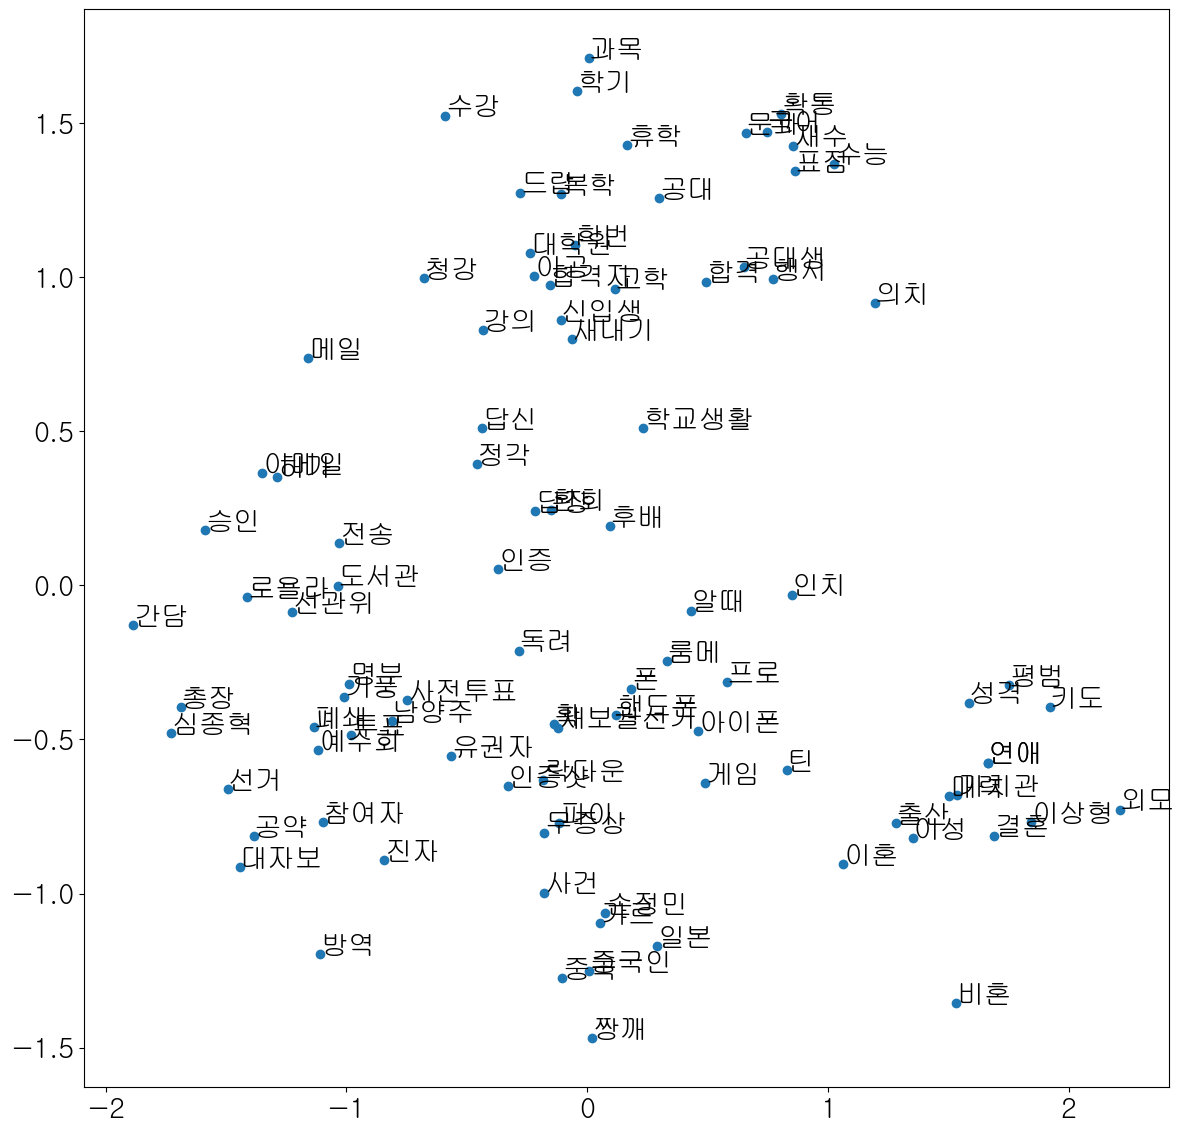

In [414]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#2차원으로 축소
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

plt.rcParams['font.family'] = 'Gulim'
plt.rc('font', size=20) 
 
# 결과2
plot_2d_graph(vocabs, xs, ys)
plt.show()
## 처음부터 100개

---

# 새 시도

## 상위 20개 키워드 간 유사도 높은 키워드 제거

In [309]:
word30s = bow_20.iloc[:200].reset_index(drop=True)

idx_del = []

for i in range(len(word30s.keyword)):
    if i in idx_del:
        continue
    for j in range(i+1,len(word30s.keyword)):
        if j in idx_del:
            continue
        sim = model_a.wv.similarity(word30s.keyword[i], word30s.keyword[j])
        if sim > 0.6:
            idx_del.append(j)

for i in idx_del:
    word30s.drop(i, inplace=True)

word30s = word30s.reset_index(drop=True).iloc[:150]
word30s

,keyword,count,dates
0,팬,10,"[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]"
1,서울대,10,"[16, 33, 36, 53, 56, 65, 72, 76, 95, 116]"
2,조교,10,"[33, 45, 47, 93, 109, 115, 127, 131, 154, 169]"
3,상담,8,"[23, 39, 43, 76, 105, 141, 147, 163]"
4,진자,8,"[2, 74, 83, 85, 87, 151, 173, 179]"
...,...,...,...
103,필수,4,"[1, 36, 49, 60]"
104,미세먼지,4,"[30, 69, 87, 126]"
105,잠,4,"[8, 18, 45, 83]"
106,펜,4,"[64, 77, 84, 146]"


## 상위 20개 키워드에 대해, 유사성을 띠는 키워드 찾기

In [310]:
words = [[] for _ in range(len(word30s))]

for i, word in enumerate(word30s.keyword):
    words[i] = model_n.wv.most_similar(word,topn=50)
    
temp = []

for idx, _words in enumerate(words):
    idx_del = []
    for i in range(len(_words)):
        if i in idx_del: continue
        for j in range(i+1, len(_words)):
            if j in idx_del: continue
            sim = model_n.wv.similarity(_words[i][0],_words[j][0])
            if sim > 0.75:
                idx_del.append(j)
    idx_del.sort()
    e = 0
    for i in idx_del:
        del _words[i-e]
        e += 1
    
    temp.append(_words)
    
word30s['words'] = temp
    
word30s.head()

,keyword,count,dates,words
0,팬,10,"[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]","[(직캠, 0.68355393409729), (아이즈, 0.6820071339607..."
1,서울대,10,"[16, 33, 36, 53, 56, 65, 72, 76, 95, 116]","[(고려대, 0.8299201726913452), (치전, 0.79265660047..."
2,조교,10,"[33, 45, 47, 93, 109, 115, 127, 131, 154, 169]","[(출결, 0.6840938925743103), (교하면, 0.66090571880..."
3,상담,8,"[23, 39, 43, 76, 105, 141, 147, 163]","[(심리상담, 0.7795162200927734), (백내장, 0.690602958..."
4,진자,8,"[2, 74, 83, 85, 87, 151, 173, 179]","[(확, 0.8742117881774902), (동선, 0.7830427289009..."


In [311]:
i = 7
print(word30s.keyword[i])
word30s.words[i]

외모


[('키도', 0.7484540343284607),
 ('성격', 0.7266263365745544),
 ('존잘', 0.7212772965431213),
 ('외양', 0.7114612460136414),
 ('자존감', 0.7083656787872314),
 ('외적', 0.7054580450057983),
 ('매력', 0.6969617605209351),
 ('재력', 0.6945910453796387),
 ('대쉬', 0.68784499168396),
 ('연애', 0.6865721940994263),
 ('이성', 0.681161105632782),
 ('평범', 0.6747162938117981),
 ('이상형', 0.6732280254364014),
 ('결정사', 0.6715046167373657),
 ('가치관', 0.6664765477180481)]

## 상위 20개 키워드에 대해, 증감 상관관계 파악

In [312]:
BoW_mat

array([[11.,  1., 29., ...,  0.,  0.,  0.],
       [ 0.,  0., 41., ...,  0.,  0.,  0.],
       [ 2.,  3., 42., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  3., 53., ...,  0.,  0.,  0.],
       [ 1.,  3., 54., ...,  1.,  2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [313]:
word30s

,keyword,count,dates,words
0,팬,10,"[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]","[(직캠, 0.68355393409729), (아이즈, 0.6820071339607..."
1,서울대,10,"[16, 33, 36, 53, 56, 65, 72, 76, 95, 116]","[(고려대, 0.8299201726913452), (치전, 0.79265660047..."
2,조교,10,"[33, 45, 47, 93, 109, 115, 127, 131, 154, 169]","[(출결, 0.6840938925743103), (교하면, 0.66090571880..."
3,상담,8,"[23, 39, 43, 76, 105, 141, 147, 163]","[(심리상담, 0.7795162200927734), (백내장, 0.690602958..."
4,진자,8,"[2, 74, 83, 85, 87, 151, 173, 179]","[(확, 0.8742117881774902), (동선, 0.7830427289009..."
...,...,...,...,...
103,필수,4,"[1, 36, 49, 60]","[(심화, 0.6720333099365234), (필선, 0.652905285358..."
104,미세먼지,4,"[30, 69, 87, 126]","[(황사, 0.8228317499160767), (미세, 0.669660925865..."
105,잠,4,"[8, 18, 45, 83]","[(잠도, 0.8457426428794861), (졸리, 0.797875344753..."
106,펜,4,"[64, 77, 84, 146]","[(라미, 0.6898508667945862), (기화, 0.664973080158..."


In [321]:
corr_keywords = [[] for _ in range(len(word30s))]

for idx in range(len(word30s)):
    #중심 키워드의 일별 증감
    main_seq = BoW_mat.T[idx_total[word30s.iloc[idx].keyword]]
    # 비교 키워드의 일별 증감
    for j, (word, _) in enumerate(word30s.iloc[idx].words):
        try :
            cor = np.corrcoef(main_seq, BoW_mat.T[idx_total[word]])
            if cor[1,0] > 0.25:
                corr_keywords[idx].append(word)
        except :
            pass

word30s['correlated_words'] = corr_keywords

C:\Users\park3\anaconda3\envs\data\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\park3\anaconda3\envs\data\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]

In [355]:
BoW_mat[:,idx_total['결혼']][124:]

array([ 3., 24.,  0.,  9.,  4.,  1.,  3., 14., 12.,  7.,  4., 16.,  5.,
       20., 13.,  3., 11.,  3., 19., 54.,  5.,  6., 22.,  4.,  2.,  3.,
        7.,  7., 16.,  6.,  7., 16., 14., 16., 15., 27., 39., 11., 10.,
       13., 18.,  4.,  7.,  3.,  4.,  8., 11.,  4.,  8.,  2.,  3., 18.,
       11., 12.,  2.,  2.,  6.,  0.])

In [350]:
word30s[0:30]

,keyword,count,dates,words,correlated_words
0,팬,10,"[34, 37, 52, 62, 112, 124, 137, 162, 168, 173]","[(직캠, 0.68355393409729), (아이즈, 0.6820071339607...",[팬덤]
1,서울대,10,"[16, 33, 36, 53, 56, 65, 72, 76, 95, 116]","[(고려대, 0.8299201726913452), (치전, 0.79265660047...",[]
2,조교,10,"[33, 45, 47, 93, 109, 115, 127, 131, 154, 169]","[(출결, 0.6840938925743103), (교하면, 0.66090571880...","[수강생, 수학학원]"
3,상담,8,"[23, 39, 43, 76, 105, 141, 147, 163]","[(심리상담, 0.7795162200927734), (백내장, 0.690602958...",[]
4,진자,8,"[2, 74, 83, 85, 87, 151, 173, 179]","[(확, 0.8742117881774902), (동선, 0.7830427289009...","[확, 동선, 무증상, 폐쇄, 방문자, 방역, 겹친, 락다운, 확산, 룸메, 격리,..."
5,휴학,8,"[3, 12, 21, 25, 37, 58, 124, 150]","[(복학, 0.7896164655685425), (졸유, 0.761773288249...","[복학, 중도, 학기, 제적]"
6,비대,8,"[3, 24, 54, 78, 87, 109, 157, 171]","[(대면, 0.8803653717041016), (전면, 0.748648881912...","[대면, 전면, 평인, 실시간, 드북]"
7,외모,8,"[5, 51, 69, 79, 143, 153, 161, 171]","[(키도, 0.7484540343284607), (성격, 0.726626336574...","[키도, 성격, 자존감, 외적, 매력, 연애, 이성, 평범, 이상형]"
8,부대,8,"[35, 85, 99, 106, 113, 137, 151, 160]","[(공군, 0.7856618165969849), (간부, 0.780412197113...","[공군, 간부, 비행단, 특기, 포상]"
9,예수회,8,"[40, 55, 63, 95, 97, 105, 116, 133]","[(재단, 0.7986060976982117), (교황청, 0.77239596843...","[재단, 교황청, 부들, 총장, 기풍, 포스텍, 수회, 국고, 분열]"


In [325]:
final_topic_list = list(word30s.correlated_words)
final_topic_list = [[word30s.keyword[i]] + x for i, x in enumerate(final_topic_list)]
final_topic_list

[['팬', '팬덤'],
 ['서울대'],
 ['조교', '수강생', '수학학원'],
 ['상담'],
 ['진자',
  '확',
  '동선',
  '무증상',
  '폐쇄',
  '방문자',
  '방역',
  '겹친',
  '락다운',
  '확산',
  '룸메',
  '격리',
  '전파'],
 ['휴학', '복학', '중도', '학기', '제적'],
 ['비대', '대면', '전면', '평인', '실시간', '드북'],
 ['외모', '키도', '성격', '자존감', '외적', '매력', '연애', '이성', '평범', '이상형'],
 ['부대', '공군', '간부', '비행단', '특기', '포상'],
 ['예수회', '재단', '교황청', '부들', '총장', '기풍', '포스텍', '수회', '국고', '분열'],
 ['아파트', '빌라', '반포', '집값', '원룸'],
 ['코인', '비트코인', '도지', '침팬치'],
 ['로욜라', '도서관', '욜라', '누수'],
 ['비율', '퍼대', '표준편차', '퍼', '평균'],
 ['세대', '펜슬', '프로'],
 ['백신', '접종', '면역', '얀', '예방', '부작용'],
 ['치킨', '고추'],
 ['족보', '테뱅', '북이면', '선대'],
 ['마스크', '덴탈', '무증상'],
 ['장학금', '국장', '다산', '등록금', '동문회', '분위', '소득'],
 ['용돈', '세뱃돈', '저축', '교통비', '부모님', '월세'],
 ['검사', '보건소', '접촉', '건강검진', '격리', '확진', '음성', '증상'],
 ['동아리', '연합', '친목', '학회', '활동', '섹티'],
 ['신고', '경찰'],
 ['커뮤', '커뮤니티'],
 ['번호', '전화번호부', '해킹'],
 ['수능', '국어', '영수', '의치', '표점', '확통', '모의고사', '재수'],
 ['결혼', '비혼', '이혼', '출산', '연애', '가치관'],
 ['가정'

In [331]:
from itertools import compress
tf = [True if x in [4,6,7,8,9,10,11,15,27,64,67,59] else False for x in range(len(final_topic_list))]
final_topic_list = list(compress(final_topic_list, tf))

In [335]:
final_topic_list

[['진자',
  '확',
  '동선',
  '무증상',
  '폐쇄',
  '방문자',
  '방역',
  '겹친',
  '락다운',
  '확산',
  '룸메',
  '격리',
  '전파'],
 ['비대', '대면', '전면', '평인', '실시간', '드북'],
 ['외모', '키도', '성격', '자존감', '외적', '매력', '연애', '이성', '평범', '이상형'],
 ['부대', '공군', '간부', '비행단', '특기', '포상'],
 ['예수회', '재단', '교황청', '부들', '총장', '기풍', '포스텍', '수회', '국고', '분열'],
 ['아파트', '빌라', '반포', '집값', '원룸'],
 ['코인', '비트코인', '도지', '침팬치'],
 ['백신', '접종', '면역', '얀', '예방', '부작용'],
 ['결혼', '비혼', '이혼', '출산', '연애', '가치관'],
 ['허가', '답신', '승인', '청강', '싸인', '증원', '사인', '수강', '드랍', '수강신청', '실라', '폐강'],
 ['새내기', '학번', '고학', '신입생', '환회', '알때', '밥약', '후배', '학교생활'],
 ['복전', '컴공', '전공', '인문', '수학과', '조기졸업', '전공자']]

In [332]:
with open('./data/topic_list.pkl','wb') as f:
    pickle.dump(final_topic_list,f)

In [333]:
with open('./data/word30s.pkl','wb') as f:
    pickle.dump(word30s,f)

## 떡밥 별 조회수/좋아요/싫어요 분석

In [340]:
import pickle

with open('./data/idx_total.pkl','rb') as f:
    idx_total = pickle.load(f)
with open('./data_l/bow_mat.pkl','rb') as f:
    cfd = pickle.load(f)

In [341]:
def KeywordCount(떡밥리스트):
    import pandas as pd
    bob_count = pd.DataFrame(columns = ['group', 'count'])
    group = 떡밥리스트
    idx_name = group[0] #떡밥키워드군의 0번째 단어를 해당 떡밥키워드군 전체를 대표&지칭
    
    for groupword in group:
        idx = 0
        word_idx = idx_total[groupword]
        for j in cfd[:, word_idx]:
            if groupword == group[0]: #그룹 내 첫번째 단어이면, 새로 정의
                bob_count.loc[idx] = [idx_name, j]
            else:
                bob_count.iloc[idx,1] += j 
            idx += 1
    return bob_count #일별 떡밥 키워드군 카운드 데이터프레임

In [343]:
KeywordCount(final_topic_list[0])['count'].sum()

3593.0

In [351]:
def KeywordCount(떡밥리스트):
    import pandas as pd
    bob_count = pd.DataFrame(columns = ['group', 'count'])
    group = 떡밥리스트
    idx_name = group[0] #떡밥키워드군의 0번째 단어를 해당 떡밥키워드군 전체를 대표&지칭
    
    for groupword in group:
        idx = 0
        word_idx = idx_total[groupword]
        for j in cfd[:, word_idx]:
            if groupword == group[0]: #그룹 내 첫번째 단어이면, 새로 정의
                bob_count.loc[idx] = [idx_name, j]
            else:
                bob_count.iloc[idx,1] += j 
            idx += 1
    return bob_count #일별 떡밥 키워드군 카운드 데이터프레임

for 떡밥리스트 in final_topic_list:
    
    떡밥인덱스 = []

    for i in range(len(noun_tokenized)):
        n_tokens = noun_tokenized[i]
        for noun in n_tokens:
            if noun in 떡밥리스트:
                떡밥인덱스.append(i)

    views=0
    likes=0
    dislikes=0
    for idx in 떡밥인덱스:
        row = token.iloc[idx]
        views += row['view']
        likes += row['likes']
        dislikes += row['dislikes']
    views /= len(떡밥인덱스)
    likes /= len(떡밥인덱스)
    dislikes /= len(떡밥인덱스)
    posts = len(떡밥인덱스)
    
    print('메인 키워드 :',떡밥리스트[0])
    try:
        print('키워드 그룹 :',떡밥리스트[1:])
    except:
        pass
    print('평균 조회수 :',views)
    print('평균 좋아요수 :',likes)
    print('평균 싫어요수 :',dislikes)
    print('총 언급횟수 :',KeywordCount(떡밥리스트)['count'].sum())
    print('총 게시글수 :', posts)
    print('------------------------------')

메인 키워드 : 진자
키워드 그룹 : ['확', '동선', '무증상', '폐쇄', '방문자', '방역', '겹친', '락다운', '확산', '룸메', '격리', '전파']
평균 조회수 : 1398.9387806096952
평균 좋아요수 : 41.38655672163918
평균 싫어요수 : 5.009745127436282
총 언급횟수 : 3593.0
총 게시글수 : 4002
------------------------------
메인 키워드 : 비대
키워드 그룹 : ['대면', '전면', '평인', '실시간', '드북']
평균 조회수 : 896.2466202376075
평균 좋아요수 : 24.925850061450227
평균 싫어요수 : 2.335927898402294
총 언급횟수 : 3971.0
총 게시글수 : 4882
------------------------------
메인 키워드 : 외모
키워드 그룹 : ['키도', '성격', '자존감', '외적', '매력', '연애', '이성', '평범', '이상형']
평균 조회수 : 1437.1995140154474
평균 좋아요수 : 38.741039659810816
평균 싫어요수 : 6.639503601492667
총 언급횟수 : 7036.0
총 게시글수 : 11523
------------------------------
메인 키워드 : 부대
키워드 그룹 : ['공군', '간부', '비행단', '특기', '포상']
평균 조회수 : 1277.2512668918919
평균 좋아요수 : 40.93158783783784
평균 싫어요수 : 2.8910472972972974
총 언급횟수 : 1921.0
총 게시글수 : 2368
------------------------------
메인 키워드 : 예수회
키워드 그룹 : ['재단', '교황청', '부들', '총장', '기풍', '포스텍', '수회', '국고', '분열']
평균 조회수 : 1732.1333619210977
평균 좋아요수 : 76.67495711835335
평균